In [1]:
# datetime.date.today()

In [2]:
#获取当前日期
# time.strftime('%Y-%m-%d',time.localtime())

In [3]:
import pandas as pd
import numpy as np
import datetime
import time

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#处理画图中文显示问题
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [6]:
#数据读取
order_data=pd.read_excel('./order_data.xlsx',sheet_name='订单表')

In [7]:
city_data=pd.read_excel('./order_data.xlsx',sheet_name='城市表')
cus_data=pd.read_excel('./order_data.xlsx',sheet_name='客户表')
saler_data=pd.read_excel('./order_data.xlsx',sheet_name='销售人员表')

In [8]:
#数据概述
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27498 entries, 0 to 27497
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   产品ID    27498 non-null  object 
 1   订单ID    27498 non-null  int64  
 2   客户ID    27498 non-null  int64  
 3   订单日期    27498 non-null  object 
 4   发货日期    27498 non-null  object 
 5   销售经理ID  27498 non-null  object 
 6   利润      27498 non-null  float64
 7   折扣      27498 non-null  float64
 8   数量      27498 non-null  int64  
 9   是否退回    27498 non-null  int64  
 10  计划发货天数  27498 non-null  int64  
 11  销售额     27498 non-null  float64
 12  实际发货天数  27498 non-null  int64  
 13  产品类型    27498 non-null  object 
 14  产品名称    27498 non-null  object 
 15  产品单价    27498 non-null  float64
 16  产品成本价   27498 non-null  int64  
dtypes: float64(4), int64(7), object(6)
memory usage: 3.6+ MB


In [9]:
order_data.describe()

,订单ID,客户ID,利润,折扣,数量,是否退回,计划发货天数,销售额,实际发货天数,产品单价,产品成本价
count,27498.000000,27498.000000,27498.000000,27498.000000,27498.000000,27498.000000,27498.000000,27498.000000,27498.000000,27498.000000,27498.000000
mean,13749.500000,10394.121209,385.951577,0.952804,5.511819,0.048949,1.998618,714.124031,5.496145,129.555284,53.629755
std,7938.133187,228.203730,653.013229,0.100509,2.884136,0.215765,0.811910,1057.953850,2.867351,159.392232,56.019619
min,1.000000,10001.000000,-20.600000,0.600000,1.000000,0.000000,1.000000,9.900000,1.000000,9.900000,3.000000
25%,6875.250000,10197.000000,54.500000,0.950000,3.000000,0.000000,1.000000,119.400000,3.000000,28.900000,17.000000
50%,13749.500000,10392.000000,125.100000,1.000000,6.000000,0.000000,2.000000,296.700000,5.000000,59.900000,20.000000
75%,20623.750000,10591.000000,359.087500,1.000000,8.000000,0.000000,3.000000,799.000000,8.000000,129.900000,80.000000
max,27498.000000,10790.000000,3999.000000,1.000000,10.000000,1.000000,3.000000,5999.000000,10.000000,599.900000,200.000000


In [10]:
order_data.客户ID.unique().shape

(790,)

In [11]:
new_order=order_data.merge(cus_data,on='客户ID',how='left')

In [12]:
new_order.shape

(27498, 21)

In [13]:
new_order.groupby(['细分','省/自治区'])['订单ID'].count()

细分   省/自治区
公司   上海        256
     云南         35
     内蒙古       105
     北京        308
     吉林        376
              ... 
消费者  辽宁        897
     重庆        285
     陕西        294
     青海         26
     黑龙江      1028
Name: 订单ID, Length: 87, dtype: int64

In [14]:
new_order.细分.unique()

array(['公司', '小型企业', '消费者'], dtype=object)

In [15]:
#将日期转变为日期格式
new_order['订单日期']=new_order['订单日期'].apply(lambda x:pd.to_datetime(x) if type(x)==int else x).dt.date
new_order['发货日期']=new_order['发货日期'].apply(lambda x:pd.to_datetime(x) if type(x)==int else x).dt.date

In [16]:
new_order['year']=new_order['订单日期'].astype('datetime64').dt.year
new_order['month']=new_order['订单日期'].astype('str').apply(lambda x:x[:7])
new_order['quater']=pd.PeriodIndex(new_order['订单日期'].astype('datetime64'), freq='Q')

In [17]:
new_order

,产品ID,订单ID,客户ID,订单日期,发货日期,销售经理ID,利润,折扣,数量,是否退回,...,产品名称,产品单价,产品成本价,客户名称,省/自治区,细分,城市ID,year,month,quater
0,p1047,1,10221,2017-01-01,2017-01-02,sale003,10.90,1.00,1,0,...,围巾,29.9,19,常光,辽宁,公司,city101,2017,2017-01,2017Q1
1,p1614,2,10706,2017-01-01,2017-01-10,sale007,249.50,1.00,5,0,...,保暖内衣,99.9,50,夏松,天津,小型企业,city520,2017,2017-01,2017Q1
2,p1614,3,10420,2017-01-01,2017-01-11,sale001,29.92,0.80,1,0,...,保暖内衣,99.9,50,洪黎明,湖南,消费者,city460,2017,2017-01,2017Q1
3,p1898,4,10372,2017-01-01,2017-01-04,sale003,12.24,0.80,2,0,...,帽子,28.9,17,林关茵,山东,消费者,city547,2017,2017-01,2017Q1
4,p1898,5,10250,2017-01-01,2017-01-07,sale003,0.34,0.60,1,0,...,帽子,28.9,17,俞荷,重庆,消费者,city582,2017,2017-01,2017Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27493,p574,27494,10506,1970-01-01,1970-01-01,sale005,25.81,0.95,2,0,...,手套,19.9,6,谢丽雪,广东,公司,city113,1970,1970-01,1970Q1
27494,p928,27495,10161,1970-01-01,1970-01-01,sale003,2399.40,1.00,6,0,...,羽绒服,599.9,200,苏冬露,黑龙江,小型企业,city433,1970,1970-01,1970Q1
27495,p979,27496,10543,1970-01-01,1970-01-01,sale002,43.80,1.00,2,0,...,毛衣,39.9,18,薛梦,上海,消费者,city378,1970,1970-01,1970Q1
27496,p979,27497,10429,1970-01-01,1970-01-01,sale002,175.20,1.00,8,0,...,毛衣,39.9,18,马丽娜,重庆,消费者,city582,1970,1970-01,1970Q1


In [18]:
new_order.year.value_counts()

2017    8435
2018    8357
2019    8208
1970    2498
Name: year, dtype: int64

In [19]:
#删除1970年的异常数据
new_order=new_order[new_order.year!=1970]

In [20]:
new_order.groupby(['细分','省/自治区','year'])['订单ID'].count()

细分   省/自治区  year
公司   上海     2017     86
            2018     78
            2019     74
     云南     2017     11
            2018     11
                   ... 
消费者  青海     2018     12
            2019      4
     黑龙江    2017    305
            2018    339
            2019    283
Name: 订单ID, Length: 261, dtype: int64

<AxesSubplot:xlabel='year'>

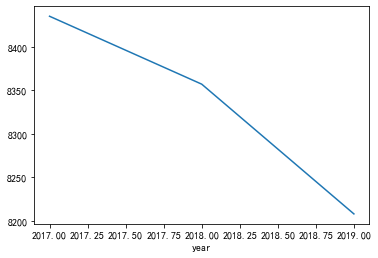

In [21]:
new_order.groupby('year')['订单ID'].count().plot()

In [22]:
# new_order.to_excel('./new_data.xlsx',sheet_name='订单表加客户信息')

<AxesSubplot:xlabel='quater'>

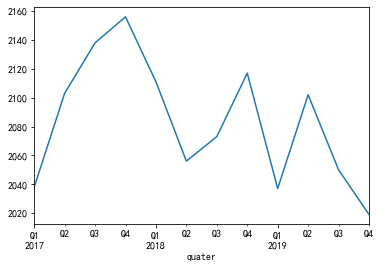

In [23]:
#基础数据了解
new_order.groupby('quater')['订单ID'].count().plot()

In [24]:
new_order_df=new_order.groupby(['细分','quater'])['订单ID'].count().reset_index(level=1)


In [25]:
for x in new_order_df.index.unique():
    print(new_order_df.loc[x].values)

[[Period('2017Q1', 'Q-DEC') 574]
 [Period('2017Q2', 'Q-DEC') 639]
 [Period('2017Q3', 'Q-DEC') 687]
 [Period('2017Q4', 'Q-DEC') 602]
 [Period('2018Q1', 'Q-DEC') 629]
 [Period('2018Q2', 'Q-DEC') 622]
 [Period('2018Q3', 'Q-DEC') 668]
 [Period('2018Q4', 'Q-DEC') 662]
 [Period('2019Q1', 'Q-DEC') 604]
 [Period('2019Q2', 'Q-DEC') 648]
 [Period('2019Q3', 'Q-DEC') 630]
 [Period('2019Q4', 'Q-DEC') 612]]
[[Period('2017Q1', 'Q-DEC') 419]
 [Period('2017Q2', 'Q-DEC') 368]
 [Period('2017Q3', 'Q-DEC') 368]
 [Period('2017Q4', 'Q-DEC') 444]
 [Period('2018Q1', 'Q-DEC') 391]
 [Period('2018Q2', 'Q-DEC') 362]
 [Period('2018Q3', 'Q-DEC') 363]
 [Period('2018Q4', 'Q-DEC') 367]
 [Period('2019Q1', 'Q-DEC') 390]
 [Period('2019Q2', 'Q-DEC') 381]
 [Period('2019Q3', 'Q-DEC') 361]
 [Period('2019Q4', 'Q-DEC') 389]]
[[Period('2017Q1', 'Q-DEC') 1045]
 [Period('2017Q2', 'Q-DEC') 1096]
 [Period('2017Q3', 'Q-DEC') 1083]
 [Period('2017Q4', 'Q-DEC') 1110]
 [Period('2018Q1', 'Q-DEC') 1091]
 [Period('2018Q2', 'Q-DEC') 1072]
 [

<AxesSubplot:xlabel='细分'>

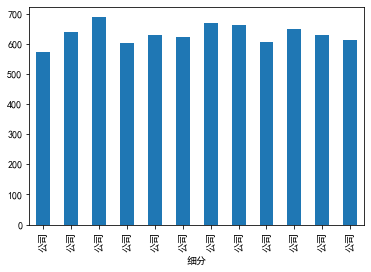

In [26]:
new_order_df.loc['公司'].订单ID.plot(kind='bar')

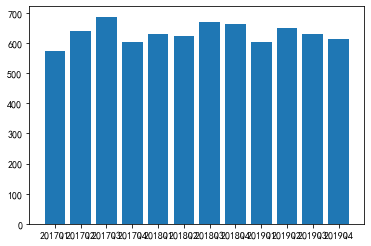

In [27]:

plt.bar(x=new_order_df.loc['公司'].quater.astype('str').tolist(),
       height=new_order_df.loc['公司'].订单ID.tolist())
plt.show()

In [28]:
new_order


,产品ID,订单ID,客户ID,订单日期,发货日期,销售经理ID,利润,折扣,数量,是否退回,...,产品名称,产品单价,产品成本价,客户名称,省/自治区,细分,城市ID,year,month,quater
0,p1047,1,10221,2017-01-01,2017-01-02,sale003,10.90,1.00,1,0,...,围巾,29.9,19,常光,辽宁,公司,city101,2017,2017-01,2017Q1
1,p1614,2,10706,2017-01-01,2017-01-10,sale007,249.50,1.00,5,0,...,保暖内衣,99.9,50,夏松,天津,小型企业,city520,2017,2017-01,2017Q1
2,p1614,3,10420,2017-01-01,2017-01-11,sale001,29.92,0.80,1,0,...,保暖内衣,99.9,50,洪黎明,湖南,消费者,city460,2017,2017-01,2017Q1
3,p1898,4,10372,2017-01-01,2017-01-04,sale003,12.24,0.80,2,0,...,帽子,28.9,17,林关茵,山东,消费者,city547,2017,2017-01,2017Q1
4,p1898,5,10250,2017-01-01,2017-01-07,sale003,0.34,0.60,1,0,...,帽子,28.9,17,俞荷,重庆,消费者,city582,2017,2017-01,2017Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,p3093,24996,10436,2019-12-28,2020-01-02,sale003,109.90,1.00,1,0,...,棉衣,199.9,90,王立勤,云南,公司,city224,2019,2019-12,2019Q4
24996,p339,24997,10248,2019-12-28,2020-01-02,sale005,64.50,1.00,5,0,...,短裤,19.9,7,孙荷,上海,公司,city378,2019,2019-12,2019Q4
24997,p339,24998,10268,2019-12-28,2019-12-29,sale004,90.30,1.00,7,0,...,短裤,19.9,7,白鹄,江苏,消费者,city523,2019,2019-12,2019Q4
24998,p339,24999,10098,2019-12-28,2020-01-07,sale003,99.15,0.85,10,0,...,短裤,19.9,7,钟忠,河北,小型企业,city281,2019,2019-12,2019Q4


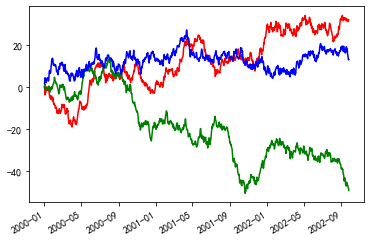

In [29]:
    df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000',periods=1000), columns=list('ABCD'))
    df = df.cumsum()
    with pd.plotting.plot_params.use('x_compat', True): #方法一
        df.A.plot(color='r')
        df.B.plot(color='g')
        df.C.plot(color='b')
    plt.show()

In [30]:
# plt.bar(user_age_count.index.tolist(),
#     user_age_count['user_id'].values.tolist(),
#         width=0.3)
# plt.show()

In [31]:
new_cus_data=cus_data.merge(city_data,on='城市ID')

In [32]:
# import pandas as pd
# writer = pd.ExcelWriter('foo.xlsx')
# df.to_excel(writer, 'Data 0')
# df.to_excel(writer, 'Data 1')
# writer.save()

In [33]:
#订单表中显示一共有17种产品
new_order.产品名称.unique().shape

(17,)

In [34]:
#可以看到用户普遍购买商品种类较多，用户平均会购买14多种产品，最少购买9类产品，最多购买17类产品，商品种类齐全是一个加分点
new_cus_buy=pd.cut(new_order[['客户ID','产品名称']].drop_duplicates().groupby('客户ID')['产品名称'].count(),3).reset_index()

In [35]:
# writer=pd.ExcelWriter('new_data.xlsx')
# new_cus_data.to_excel(writer,sheet_name='客户表拼接城市表')
# new_order.to_excel(writer,sheet_name='订单表拼城市表')
# new_cus_buy.to_excel(writer,sheet_name='用户购买商品数量分布')
# writer.save()

In [36]:
new_order[['客户ID','产品名称']].drop_duplicates().groupby('客户ID')['产品名称'].count().describe()

count    790.000000
mean      14.435443
std        1.479136
min        9.000000
25%       13.000000
50%       15.000000
75%       15.000000
max       17.000000
Name: 产品名称, dtype: float64

In [37]:
#不分类进行RFM分析
new_order['当前日期']=datetime.date.today()
new_order['R']=(new_order['当前日期'].astype('datetime64')-new_order['订单日期'].astype('datetime64')).dt.days

In [38]:
rfm_1=new_order.groupby('客户ID').agg({
    'R':'min',
    '订单ID':'count',
    '销售额':'sum'
}).reset_index()

In [39]:
rfm_1

,客户ID,R,订单ID,销售额
0,10001,328,33,27188.3
1,10002,337,33,24928.0
2,10003,357,28,21240.9
3,10004,325,29,13134.3
4,10005,339,31,34525.9
...,...,...,...,...
785,10786,313,21,14129.4
786,10787,321,26,13127.8
787,10788,353,35,22359.0
788,10789,327,36,16459.7


In [40]:
rfm_1=rfm_1.rename(columns={'订单ID':'F','销售额':'M'})

In [41]:
rfm_1.mean()

客户ID    10395.500000
R         344.189873
F          31.645570
M       22641.626709
dtype: float64

In [42]:
def contract_mean(r,f,m,rm,fm,mm):
    if r<rm and f>=fm and m>=mm:
        return '重要价值客户'
    elif r>=rm and f>=fm and m>=mm:
        return '重要唤回客户'
    elif r<rm and f<fm and m>=mm:
        return '重要深耕客户'
    elif r>=rm and f<fm and m>=mm:
        return '重要流失客户'
    elif r<rm and f>=fm and m<mm:
        return '潜力客户'
    elif r<rm and f<fm and m<mm:
        return '新客户'
    elif r>=rm and f>=fm and m<mm:
        return '一般维持客户'
    elif r>=rm and f<=fm and m<mm:
        return '流失客户'

In [43]:
rfm_1['用户价值判断']=rfm_1.apply(lambda x:contract_mean(x.R,x.F,x.M,rfm_1.mean()[1],rfm_1.mean()[2],rfm_1.mean()[3]),axis=1)

In [44]:
rfm_1

,客户ID,R,F,M,用户价值判断
0,10001,328,33,27188.3,重要价值客户
1,10002,337,33,24928.0,重要价值客户
2,10003,357,28,21240.9,流失客户
3,10004,325,29,13134.3,新客户
4,10005,339,31,34525.9,重要深耕客户
...,...,...,...,...,...
785,10786,313,21,14129.4,新客户
786,10787,321,26,13127.8,新客户
787,10788,353,35,22359.0,一般维持客户
788,10789,327,36,16459.7,潜力客户


In [45]:
rfm_1_result=rfm_1.groupby('用户价值判断')['客户ID'].count().reset_index()

In [46]:
rfm_1_result

,用户价值判断,客户ID
0,一般维持客户,38
1,新客户,171
2,流失客户,120
3,潜力客户,91
4,重要价值客户,172
5,重要唤回客户,85
6,重要流失客户,46
7,重要深耕客户,67


In [47]:
rfm_1_result['rate']=np.round(100*rfm_1_result['客户ID']/np.sum(rfm_1_result['客户ID']),2)

In [48]:
rfm_1_result

,用户价值判断,客户ID,rate
0,一般维持客户,38,4.81
1,新客户,171,21.65
2,流失客户,120,15.19
3,潜力客户,91,11.52
4,重要价值客户,172,21.77
5,重要唤回客户,85,10.76
6,重要流失客户,46,5.82
7,重要深耕客户,67,8.48


<AxesSubplot:ylabel='rate'>

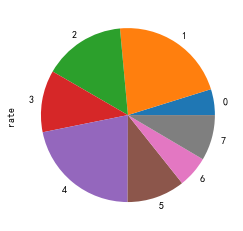

In [49]:
rfm_1_result.rate.plot(kind='pie',x=rfm_1_result.用户价值判断.values)

In [50]:
#如果按2017年分析rfm模型
rfm_2=new_order[new_order['year']==2017].groupby('客户ID').agg({
    'R':'min',
    '订单ID':'count',
    '销售额':'sum'
}).reset_index()

In [51]:
rfm_2=rfm_2.rename(columns={'订单ID':'F','销售额':'M'})

In [52]:
rfm_2['用户价值判断']=rfm_2.apply(lambda x:contract_mean(x.R,x.F,x.M,rfm_2.mean()[1],rfm_2.mean()[2],rfm_2.mean()[3]),axis=1)

In [53]:
rfm_2_result=rfm_2.groupby('用户价值判断')['客户ID'].count().reset_index()

In [54]:
rfm_2_result['rate']=np.round(100*rfm_2_result['客户ID']/np.sum(rfm_2_result['客户ID']),2)

In [55]:
rfm_2_result['year']='2017'

In [56]:
rfm_2_result

,用户价值判断,客户ID,rate,year
0,一般维持客户,43,5.44,2017
1,新客户,173,21.90,2017
2,流失客户,117,14.81,2017
3,潜力客户,109,13.80,2017
4,重要价值客户,183,23.16,2017
5,重要唤回客户,55,6.96,2017
6,重要流失客户,50,6.33,2017
7,重要深耕客户,60,7.59,2017


In [57]:
rfm_3=new_order[new_order['year']==2018].groupby('客户ID').agg({
    'R':'min',
    '订单ID':'count',
    '销售额':'sum'
}).reset_index()

In [58]:
rfm_3=rfm_3.rename(columns={'订单ID':'F','销售额':'M'})

In [59]:
rfm_3['用户价值判断']=rfm_3.apply(lambda x:contract_mean(x.R,x.F,x.M,rfm_3.mean()[1],rfm_3.mean()[2],rfm_3.mean()[3]),axis=1)



In [60]:
rfm_3_result=rfm_3.groupby('用户价值判断')['客户ID'].count().reset_index()

In [61]:
rfm_3_result['rate']=np.round(100*rfm_3_result['客户ID']/np.sum(rfm_3_result['客户ID']),2)

In [62]:
rfm_3_result['year']='2018'

In [63]:
rfm_3_result

,用户价值判断,客户ID,rate,year
0,一般维持客户,39,4.94,2018
1,新客户,167,21.14,2018
2,流失客户,141,17.85,2018
3,潜力客户,111,14.05,2018
4,重要价值客户,164,20.76,2018
5,重要唤回客户,76,9.62,2018
6,重要流失客户,44,5.57,2018
7,重要深耕客户,48,6.08,2018


In [64]:
rfm_4=new_order[new_order['year']==2019].groupby('客户ID').agg({
    'R':'min',
    '订单ID':'count',
    '销售额':'sum'
}).reset_index()

In [65]:
rfm_4=rfm_4.rename(columns={'订单ID':'F','销售额':'M'})
rfm_4['用户价值判断']=rfm_4.apply(lambda x:contract_mean(x.R,x.F,x.M,rfm_4.mean()[1],rfm_4.mean()[2],rfm_4.mean()[3]),axis=1)



In [66]:
rfm_4_result=rfm_4.groupby('用户价值判断')['客户ID'].count().reset_index()
rfm_4_result['rate']=np.round(100*rfm_4_result['客户ID']/np.sum(rfm_4_result['客户ID']),2)

In [67]:
rfm_4_result['year']='2019'

In [68]:
pd.concat([rfm_2_result,rfm_3_result,rfm_4_result])

,用户价值判断,客户ID,rate,year
0,一般维持客户,43,5.44,2017
1,新客户,173,21.90,2017
2,流失客户,117,14.81,2017
3,潜力客户,109,13.80,2017
4,重要价值客户,183,23.16,2017
5,重要唤回客户,55,6.96,2017
6,重要流失客户,50,6.33,2017
7,重要深耕客户,60,7.59,2017
0,一般维持客户,39,4.94,2018
1,新客户,167,21.14,2018


In [69]:
year_rfm=pd.concat([rfm_2_result,rfm_3_result,rfm_4_result]).groupby(['用户价值判断','year']).agg({
    '客户ID':'sum',
    'rate':'sum'}).reset_index(level=[0,1])

In [70]:
#数据透视表
year_rfm_rate=pd.pivot_table(year_rfm,
              index='用户价值判断',
              columns='year',
              values='rate')

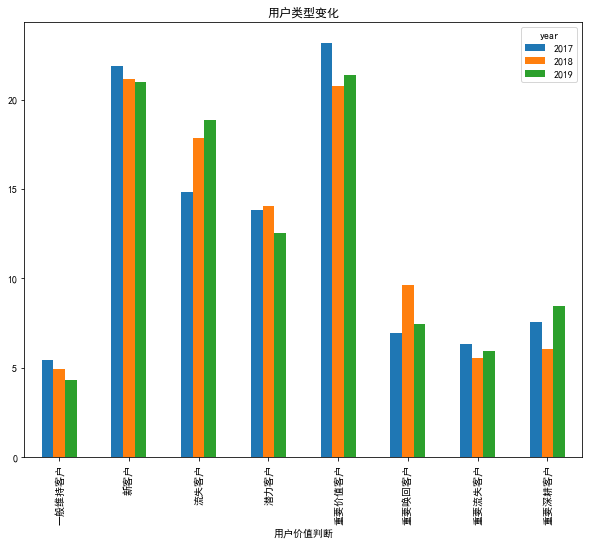

In [71]:
#绘制图形
picture=year_rfm_rate.plot(kind='bar',
                  title='用户类型变化',
                  figsize=(10,8))


In [72]:
# fig=picture.get_figure()
# fig.savefig('17-19用户价值类型比例变化.png')

In [73]:
# year_rfm.to_excel('./year_rfm.xlsx',sheet_name='Sheet1')

In [74]:
year_rfm_rate

year,2017,2018,2019
用户价值判断,,,
一般维持客户,5.44,4.94,4.30
新客户,21.90,21.14,21.01
流失客户,14.81,17.85,18.86
潜力客户,13.80,14.05,12.53
重要价值客户,23.16,20.76,21.39
重要唤回客户,6.96,9.62,7.47
重要流失客户,6.33,5.57,5.95
重要深耕客户,7.59,6.08,8.48


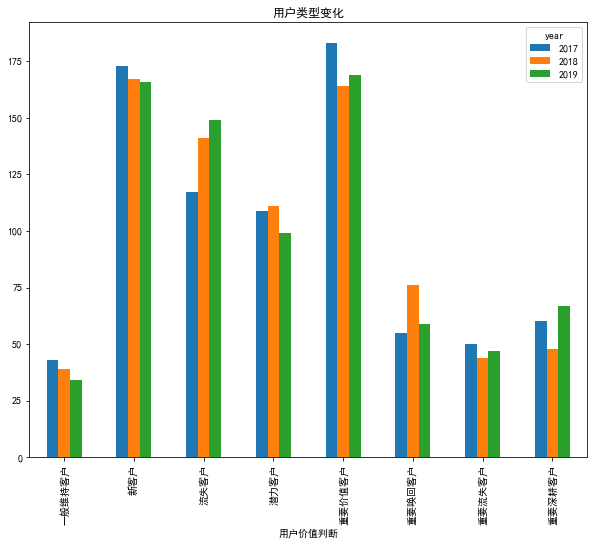

In [75]:
#绘制图形
#数据透视表
year_rfm_num=pd.pivot_table(year_rfm,
              index='用户价值判断',
              columns='year',
              values='客户ID')
picture2=year_rfm_num.plot(kind='bar',
                  title='用户类型变化',
                  figsize=(10,8))



In [76]:
year_rfm.groupby('year')['客户ID'].sum()

year
2017    790
2018    790
2019    790
Name: 客户ID, dtype: int64

In [77]:
# #查看留存率
# #但是每个用户每个季度都有订单看不出问题。。。。。。
# retention=new_order.groupby(['客户ID','quater'])['订单ID'].count().reset_index()

In [78]:
# retention['是否留存']=retention['订单ID'].apply(lambda x:1 if x>0 else 0)

In [79]:
# np.sum(retention['是否留存'])

In [80]:
new_order.是否退回.dtype

dtype('int64')

In [81]:
#所以剔除退货订单
new_order2=new_order[new_order['是否退回']==0]

In [82]:
new_order2

,产品ID,订单ID,客户ID,订单日期,发货日期,销售经理ID,利润,折扣,数量,是否退回,...,产品成本价,客户名称,省/自治区,细分,城市ID,year,month,quater,当前日期,R
0,p1047,1,10221,2017-01-01,2017-01-02,sale003,10.90,1.00,1,0,...,19,常光,辽宁,公司,city101,2017,2017-01,2017Q1,2020-11-02,1401
1,p1614,2,10706,2017-01-01,2017-01-10,sale007,249.50,1.00,5,0,...,50,夏松,天津,小型企业,city520,2017,2017-01,2017Q1,2020-11-02,1401
2,p1614,3,10420,2017-01-01,2017-01-11,sale001,29.92,0.80,1,0,...,50,洪黎明,湖南,消费者,city460,2017,2017-01,2017Q1,2020-11-02,1401
3,p1898,4,10372,2017-01-01,2017-01-04,sale003,12.24,0.80,2,0,...,17,林关茵,山东,消费者,city547,2017,2017-01,2017Q1,2020-11-02,1401
4,p1898,5,10250,2017-01-01,2017-01-07,sale003,0.34,0.60,1,0,...,17,俞荷,重庆,消费者,city582,2017,2017-01,2017Q1,2020-11-02,1401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,p3093,24996,10436,2019-12-28,2020-01-02,sale003,109.90,1.00,1,0,...,90,王立勤,云南,公司,city224,2019,2019-12,2019Q4,2020-11-02,310
24996,p339,24997,10248,2019-12-28,2020-01-02,sale005,64.50,1.00,5,0,...,7,孙荷,上海,公司,city378,2019,2019-12,2019Q4,2020-11-02,310
24997,p339,24998,10268,2019-12-28,2019-12-29,sale004,90.30,1.00,7,0,...,7,白鹄,江苏,消费者,city523,2019,2019-12,2019Q4,2020-11-02,310
24998,p339,24999,10098,2019-12-28,2020-01-07,sale003,99.15,0.85,10,0,...,7,钟忠,河北,小型企业,city281,2019,2019-12,2019Q4,2020-11-02,310


In [83]:
# rfm_result=pd.DataFrame()
# for year in [2017,2018,2019]:
#     rfm_5=new_order2[new_order2['year']==year].groupby('客户ID').agg({
#         'R':'min',
#         '订单ID':'count',
#         '销售额':'sum'
#     }).reset_index()
#     rfm_5=rfm_5.rename(columns={'订单ID':'F','销售额':'M'})
#     rfm_5['用户价值判断']=rfm_5.apply(lambda x:contract_mean(x.R,x.F,x.M,rfm_5.mean()[1],rfm_5.mean()[2],rfm_5.mean()[3]),axis=1)
#     rfm_5_result=rfm_5.groupby('用户价值判断')['客户ID'].count().reset_index()
#     rfm_5_result['rate']=np.round(100*rfm_5_result['客户ID']/np.sum(rfm_5_result['客户ID']),2)
#     rfm_5_result['year']=str(year)
#     rfm_result=rfm_result.append(rfm_5_result)

In [84]:
# rfm_result

In [85]:
# #没有退货的
# year_rfm_no=rfm_result.groupby(['用户价值判断','year']).agg({
#     '客户ID':'sum',
#     'rate':'sum'}).reset_index(level=[0,1])


In [86]:
#数据透视表
# year_rfm_no_table=pd.pivot_table(year_rfm_no,
#               index='用户价值判断',
#               columns='year',
#               values='rate')
# picture2=year_rfm_no_table.plot(kind='bar',
#                   title='用户类型变化',
#                   figsize=(10,8))

In [87]:
# fig=picture2.get_figure()
# fig.savefig('17-19没有退货用户价值类型比例变化.png')

In [88]:
new_order

,产品ID,订单ID,客户ID,订单日期,发货日期,销售经理ID,利润,折扣,数量,是否退回,...,产品成本价,客户名称,省/自治区,细分,城市ID,year,month,quater,当前日期,R
0,p1047,1,10221,2017-01-01,2017-01-02,sale003,10.90,1.00,1,0,...,19,常光,辽宁,公司,city101,2017,2017-01,2017Q1,2020-11-02,1401
1,p1614,2,10706,2017-01-01,2017-01-10,sale007,249.50,1.00,5,0,...,50,夏松,天津,小型企业,city520,2017,2017-01,2017Q1,2020-11-02,1401
2,p1614,3,10420,2017-01-01,2017-01-11,sale001,29.92,0.80,1,0,...,50,洪黎明,湖南,消费者,city460,2017,2017-01,2017Q1,2020-11-02,1401
3,p1898,4,10372,2017-01-01,2017-01-04,sale003,12.24,0.80,2,0,...,17,林关茵,山东,消费者,city547,2017,2017-01,2017Q1,2020-11-02,1401
4,p1898,5,10250,2017-01-01,2017-01-07,sale003,0.34,0.60,1,0,...,17,俞荷,重庆,消费者,city582,2017,2017-01,2017Q1,2020-11-02,1401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,p3093,24996,10436,2019-12-28,2020-01-02,sale003,109.90,1.00,1,0,...,90,王立勤,云南,公司,city224,2019,2019-12,2019Q4,2020-11-02,310
24996,p339,24997,10248,2019-12-28,2020-01-02,sale005,64.50,1.00,5,0,...,7,孙荷,上海,公司,city378,2019,2019-12,2019Q4,2020-11-02,310
24997,p339,24998,10268,2019-12-28,2019-12-29,sale004,90.30,1.00,7,0,...,7,白鹄,江苏,消费者,city523,2019,2019-12,2019Q4,2020-11-02,310
24998,p339,24999,10098,2019-12-28,2020-01-07,sale003,99.15,0.85,10,0,...,7,钟忠,河北,小型企业,city281,2019,2019-12,2019Q4,2020-11-02,310


In [89]:
quater_order=new_order.groupby(['客户ID','quater'])['订单ID'].count().reset_index()

In [90]:
quater_order

,客户ID,quater,订单ID
0,10001,2017Q1,2
1,10001,2017Q2,1
2,10001,2017Q3,4
3,10001,2017Q4,6
4,10001,2018Q1,6
...,...,...,...
8794,10790,2018Q3,7
8795,10790,2018Q4,5
8796,10790,2019Q1,3
8797,10790,2019Q2,3


In [91]:
df=pd.DataFrame()
base_order=quater_order.iloc[:13,:]
base_order['订单ID']=0
for client_id in new_order.客户ID.unique():
    base_order2=base_order.copy()
    base_order2['客户ID']=client_id
    df=df.append(base_order2)

In [92]:
df.drop_duplicates(inplace=True)

In [93]:
quater_order=df.merge(quater_order,on=['客户ID','quater'],how='left')

In [94]:
quater_order['是否有订单']=quater_order['订单ID_y'].apply(lambda x:1 if x>0 else 0)

In [95]:
quater_order

,客户ID,quater,订单ID_x,订单ID_y,是否有订单
0,10221,2017Q1,0,4.0,1
1,10221,2017Q2,0,5.0,1
2,10221,2017Q3,0,3.0,1
3,10221,2017Q4,0,4.0,1
4,10221,2018Q1,0,3.0,1
...,...,...,...,...,...
9475,10538,2018Q4,0,1.0,1
9476,10538,2019Q1,0,NaN,0
9477,10538,2019Q2,0,4.0,1
9478,10538,2019Q3,0,1.0,1


In [96]:
quater_order_table=pd.pivot_table(quater_order,
              index='客户ID',
              columns='quater',
              values='是否有订单')

In [97]:
new_order.columns

Index(['产品ID', '订单ID', '客户ID', '订单日期', '发货日期', '销售经理ID', '利润', '折扣', '数量',
       '是否退回', '计划发货天数', '销售额', '实际发货天数', '产品类型', '产品名称', '产品单价', '产品成本价',
       '客户名称', '省/自治区', '细分', '城市ID', 'year', 'month', 'quater', '当前日期', 'R'],
      dtype='object')

In [98]:
new_order.groupby('客户ID')['销售额'].sum()

客户ID
10001    27188.3
10002    24928.0
10003    21240.9
10004    13134.3
10005    34525.9
          ...   
10786    14129.4
10787    13127.8
10788    22359.0
10789    16459.7
10790    23777.8
Name: 销售额, Length: 790, dtype: float64

In [99]:
quater_order_table

quater,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
客户ID,,,,,,,,,,,,
10001,1,1,1,1,1,1,1,1,1,1,1,1
10002,0,1,1,1,1,1,1,1,1,1,1,1
10003,1,1,1,1,1,1,1,1,1,1,1,1
10004,1,1,1,1,1,0,1,1,1,1,1,1
10005,1,1,0,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10786,1,1,1,1,1,1,1,1,1,0,1,1
10787,1,1,1,1,0,1,1,1,1,1,1,1
10788,1,1,1,1,1,1,1,1,1,1,1,1


In [100]:
# quater_order_table.to_excel('./用户留存率.xlsx',sheet_name='Sheet1')

In [101]:
quater_order_table.columns.name=None

In [102]:
quater_order_table.columns[11]

Period('2019Q4', 'Q-DEC')

In [103]:
for i in range(12):
    print(str(2017+(i//4))+'Q'+str((i)%4+1)+'的留存率为%.2f%%' % (np.sum(quater_order_table[quater_order_table.columns[i]])/quater_order_table.shape[0]*100))


2017Q1的留存率为92.28%
2017Q2的留存率为92.03%
2017Q3的留存率为93.04%
2017Q4的留存率为92.03%
2018Q1的留存率为92.66%
2018Q2的留存率为92.91%
2018Q3的留存率为93.54%
2018Q4的留存率为94.56%
2019Q1的留存率为92.03%
2019Q2的留存率为93.80%
2019Q3的留存率为91.90%
2019Q4的留存率为93.04%


In [104]:
# #计算去除退货后用户的留存率
# new_order2
# quater_order=new_order.groupby(['客户ID','quater'])['订单ID'].count().reset_index()
# df=pd.DataFrame()
# base_order=quater_order.iloc[:13,:]
# base_order['订单ID']=0
# for client_id in new_order.客户ID.unique():
#     base_order2=base_order.copy()
#     base_order2['客户ID']=client_id
#     df=df.append(base_order2)
# df.drop_duplicates(inplace=True)
# quater_order=df.merge(quater_order,on=['客户ID','quater'],how='left')
# quater_order['是否有订单']=quater_order['订单ID_y'].apply(lambda x:1 if x>0 else 0)
# quater_order_table=pd.pivot_table(quater_order,
#               index='客户ID',
#               columns='quater',
#               values='是否有订单')
# quater_order_table['money_amount']=new_order.groupby('客户ID')['销售额'].sum()
# quater_order_table

In [105]:
new_cus_data

,客户ID,客户名称,省/自治区,细分,城市ID,国家,地区,发货城市
0,10001,陈嫒,山东,消费者,city183,中国,华北,济宁
1,10002,贾嫒,内蒙古,公司,city183,中国,华北,济宁
2,10006,陈安,内蒙古,消费者,city183,中国,华北,济宁
3,10085,周诚,内蒙古,公司,city183,中国,华北,济宁
4,10274,吕欢悦,山东,小型企业,city183,中国,华北,济宁
...,...,...,...,...,...,...,...,...
785,10779,马雯,安徽,公司,city459,中国,华东,芜湖
786,10783,邹雯,福建,消费者,city383,中国,华东,邵武
787,10784,余雯,广东,消费者,city517,中国,中南,阳江
788,10786,薛武,重庆,消费者,city538,中国,西南,永川


In [106]:
new_order2=new_order.merge(new_cus_data[['城市ID','地区']],on='城市ID')

In [107]:
# new_order2.to_excel('./订单表拼接城市地区.xlsx',sheet_name='Sheet1')

In [108]:
#用户画像分析
#直接拿tableau作图


In [109]:
new_order.columns

Index(['产品ID', '订单ID', '客户ID', '订单日期', '发货日期', '销售经理ID', '利润', '折扣', '数量',
       '是否退回', '计划发货天数', '销售额', '实际发货天数', '产品类型', '产品名称', '产品单价', '产品成本价',
       '客户名称', '省/自治区', '细分', '城市ID', 'year', 'month', 'quater', '当前日期', 'R'],
      dtype='object')

## 货分析

In [110]:
cus_data

,客户ID,客户名称,省/自治区,细分,城市ID
0,10001,陈嫒,山东,消费者,city183
1,10002,贾嫒,内蒙古,公司,city183
2,10003,巩嫒,湖北,公司,city475
3,10004,罗嫒,广东,小型企业,city141
4,10005,余嫒,黑龙江,公司,city412
...,...,...,...,...,...
785,10786,薛武,重庆,消费者,city538
786,10787,陶武,海南,公司,city122
787,10788,田武,广东,公司,city254
788,10789,戴武,山东,消费者,city322


In [111]:
#货分析
#物流分析
#实际物流点，有物流
wuliu=city_data.merge(cus_data[['省/自治区','城市ID']],on='城市ID',how='left').drop_duplicates()

In [112]:
city_data

,国家,地区,发货城市,城市ID
0,中国,东北,阿城,city001
1,中国,西北,阿克苏,city002
2,中国,华北,阿里河,city003
3,中国,中南,安埠,city004
4,中国,东北,安达,city005
...,...,...,...,...
587,中国,华东,诸暨,city588
588,中国,中南,驻马店,city589
589,中国,东北,庄河,city590
590,中国,西南,自贡,city591


In [113]:
#每个地区有几个发货城市
city_data.groupby('地区')['发货城市'].count()

地区
东北    131
中南    157
华东    167
华北     63
西北     28
西南     46
Name: 发货城市, dtype: int64

In [114]:
wuliu=city_data.merge(new_order[['订单ID','城市ID','计划发货天数','实际发货天数','quater','year']],on='城市ID',how='left')

In [115]:
wuliu['订单ID']=wuliu.订单ID.fillna(0)

In [116]:
wuliu['是否有订单']=wuliu['订单ID'].apply(lambda x:1 if x>0 else 0)

In [117]:
# wuliu.to_excel('./各物流点订单个数.xlsx',sheet_name='Sheet1')

In [118]:
wuliu2=wuliu[wuliu['是否有订单']==1]

In [119]:
wuliu2_df=wuliu2.groupby(['地区','发货城市','year'])['是否有订单'].sum().reset_index()

In [120]:
wuliu2_df_table=wuliu2_df.pivot_table(index='发货城市',
                     columns='year',
                     values='是否有订单')

In [121]:
wuliu2_df_table['mean']=wuliu2_df_table.mean(axis=1)

In [122]:
def panduan(x,minues=2):
    if x>minues:
        return '有所增加'
    elif x<-minues:
        return '有所减少'
    else:
        return '无明显变化'

In [123]:
wuliu2_df_table['订单数量变化']=(wuliu2_df_table[2019.0]-wuliu2_df_table['mean']).apply(panduan)

In [124]:
wuliu2_df_table=wuliu2_df_table.reset_index()

In [125]:
wuliu2['是否按计划时间发货']=(wuliu2['实际发货天数']-wuliu2['计划发货天数']).apply(lambda x:0 if x>0 else 1)

In [126]:
wuliu2['没有按计划时间发货']=1-wuliu2['是否按计划时间发货']

In [127]:
wuliu2

,国家,地区,发货城市,城市ID,订单ID,计划发货天数,实际发货天数,quater,year,是否有订单,是否按计划时间发货,没有按计划时间发货
0,中国,东北,阿城,city001,660.0,2.0,8.0,2017Q1,2017.0,1,0,1
1,中国,东北,阿城,city001,784.0,3.0,10.0,2017Q1,2017.0,1,0,1
2,中国,东北,阿城,city001,1000.0,3.0,7.0,2017Q1,2017.0,1,0,1
3,中国,东北,阿城,city001,1255.0,3.0,7.0,2017Q1,2017.0,1,0,1
4,中国,东北,阿城,city001,1363.0,1.0,10.0,2017Q1,2017.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25263,中国,西南,遵义,city592,23324.0,1.0,10.0,2019Q4,2019.0,1,0,1
25264,中国,西南,遵义,city592,23506.0,1.0,7.0,2019Q4,2019.0,1,0,1
25265,中国,西南,遵义,city592,23617.0,1.0,8.0,2019Q4,2019.0,1,0,1
25266,中国,西南,遵义,city592,23858.0,3.0,3.0,2019Q4,2019.0,1,1,0


In [128]:
wuliu2_df3=wuliu2.groupby('发货城市').agg({
    '是否按计划时间发货':'sum',
    '没有按计划时间发货':'sum',
        '订单ID':'count'
}).reset_index()
wuliu2_df3['按时发货比例']=wuliu2_df3['是否按计划时间发货']/wuliu2_df3['订单ID']

In [129]:
wuliu2_df2=wuliu2.groupby(['发货城市','quater']).agg({
    '计划发货天数':'mean',
    '实际发货天数':'mean'
}).reset_index()

In [130]:
wuliu2_df2

,发货城市,quater,计划发货天数,实际发货天数
0,七台河,2017Q1,1.916667,5.583333
1,七台河,2017Q2,1.642857,4.928571
2,七台河,2017Q3,2.125000,5.125000
3,七台河,2017Q4,2.125000,7.625000
4,七台河,2018Q1,2.250000,6.750000
...,...,...,...,...
3724,龙泉,2018Q4,2.000000,7.000000
3725,龙泉,2019Q1,2.250000,6.000000
3726,龙泉,2019Q2,2.500000,6.333333
3727,龙泉,2019Q3,2.250000,4.625000


In [131]:
wuliu2_df2_table=wuliu2_df2.pivot_table(index='发货城市',
                      columns='quater',
                      values='实际发货天数')

In [132]:
wuliu2_df2_table['mean']=wuliu2_df2_table.mean(axis=1)

In [133]:
wuliu2_df2_table['实际发货天数变化']=(wuliu2_df2_table.iloc[:,-2]-wuliu2_df2_table['mean']).apply(lambda x:panduan(x,1))

In [134]:
wuliu2_df2_table=wuliu2_df2_table.reset_index()

In [135]:
wuliu2_df2_table

quater,发货城市,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,mean,实际发货天数变化
0,七台河,5.583333,4.928571,5.125000,7.625000,6.750000,5.000000,5.400000,5.000000,7.250000,6.400000,5.444444,6.600000,5.925529,无明显变化
1,万县,7.250000,6.666667,7.333333,3.000000,5.000000,5.666667,2.000000,4.500000,2.500000,6.500000,6.250000,3.500000,5.013889,有所减少
2,三亚,5.500000,6.333333,5.000000,5.666667,9.000000,3.000000,2.000000,6.666667,NaN,4.000000,4.166667,1.000000,4.757576,有所减少
3,上梅,4.500000,7.750000,4.000000,3.666667,6.500000,2.000000,4.500000,8.000000,5.500000,3.500000,5.000000,5.750000,5.055556,无明显变化
4,上海,5.000000,5.250000,5.542373,3.933333,5.677966,5.886792,5.840000,6.245283,5.219512,5.061538,5.760000,5.604167,5.418414,无明显变化
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,黑山,5.000000,2.800000,5.000000,5.500000,5.000000,3.000000,6.571429,6.833333,6.000000,7.333333,4.666667,3.000000,5.058730,有所减少
320,齐齐哈尔,5.230769,6.090909,5.700000,4.833333,4.533333,5.133333,4.368421,6.125000,6.642857,7.285714,5.857143,5.727273,5.627341,无明显变化
321,龙口,7.250000,1.000000,8.000000,5.666667,10.000000,NaN,4.500000,4.666667,6.500000,4.000000,4.000000,5.000000,5.507576,无明显变化
322,龙江,7.500000,9.000000,6.000000,NaN,6.000000,4.666667,4.666667,4.000000,4.500000,5.000000,6.000000,6.333333,5.787879,无明显变化


In [136]:
wuliu2_df3=wuliu2_df3.merge(wuliu2_df_table[['发货城市','订单数量变化']],on='发货城市').merge(wuliu2_df2_table[['发货城市','实际发货天数变化']],on='发货城市')


In [137]:
wuliu2_df3

,发货城市,是否按计划时间发货,没有按计划时间发货,订单ID,按时发货比例,订单数量变化,实际发货天数变化
0,七台河,17,76,93,0.182796,有所减少,无明显变化
1,万县,7,33,40,0.175000,无明显变化,有所减少
2,三亚,12,25,37,0.324324,无明显变化,有所减少
3,上梅,8,26,34,0.235294,无明显变化,无明显变化
4,上海,141,494,635,0.222047,有所减少,无明显变化
...,...,...,...,...,...,...,...
319,黑山,19,47,66,0.287879,有所增加,有所减少
320,齐齐哈尔,34,149,183,0.185792,有所减少,无明显变化
321,龙口,8,20,28,0.285714,无明显变化,无明显变化
322,龙江,5,26,31,0.161290,无明显变化,无明显变化


In [138]:
wuliu2_df3['按时发货比例'].describe()

count    324.000000
mean       0.201551
std        0.063533
min        0.052632
25%        0.161290
50%        0.194061
75%        0.234375
max        0.424242
Name: 按时发货比例, dtype: float64